## Import 

In [1]:
%matplotlib notebook


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import colors
import copy
from time import sleep
import matplotlib.animation as animation



## Usefull functions

###### useful function to next find the neighbors of a given node

In [3]:
def inter(x, a):
    if x//a not in [0, 1]:
        return "error"
    else:
        if x//a == 0:
            return 1
        return -1

###### neighbors of a given node we consider that a node has a maximum number of 8 neighbors

In [4]:
def neighbor(node, shape):
    x, y = node[0], node[1]
    max_index = shape - 1

    pos_x = x % max_index
    pos_y = y % max_index

    # node is not on the edge of the grid
    if pos_x != 0 and pos_y != 0:
        return ([(x - 1, y), (x - 1, y + 1), (x, y + 1), (x + 1, y + 1), (x + 1, y), (x + 1, y - 1), (x, y - 1),
                 (x - 1, y - 1)])

    # node is on one of the corner
    elif pos_x == 0 and pos_y == 0:
        return ([(x + inter(x, max_index), y), (x + inter(x, max_index), y + inter(y, max_index)),
                 (x, y + inter(y, max_index))])

    # other cases
    else:
        if pos_x == 0:
            return ([(x, y + 1), (x + inter(x, max_index), y + 1), (x + inter(x, max_index), y),
                     (x + inter(x, max_index), y - 1), (x, y - 1)])
        else:
            return ([(x + 1, y), (x + 1, y + inter(y, max_index)), (x, y + inter(y, max_index)),
                     (x - 1, y + inter(y, max_index)), (x - 1, y)])


###### returns the percentage of alike neighbors of a node

In [5]:
def satisfied(grid, node):
    size = grid.shape[0]
    kind = grid[node[0]][node[1]]
    nb_alike = 0  # type: int
    surroundings = 0
    neighbors = neighbor(node, size)
    for n in neighbors:
        if grid[n[0]][n[1]] == kind:
            nb_alike += 1
        if grid[n[0]][n[1]] != 0:
            surroundings += 1
    return nb_alike/surroundings

###### returns the unsatisfied agents given the tolerance percentage returns both the coordinates and the type of

In [6]:
def unsatisfied_agents(t, grid):
    res = []
    size = grid.shape[0]
    for i in range(size):
        for j in range(size):
            if grid[i][j] != 0 and satisfied(grid, (i, j)) < t:
                res.append(((i, j), grid[i][j]))
    return res

###### returns the empty cases of a grid returns both the coordinates and the kind, 0

In [7]:
def empty_cases(grid):
    size = grid.shape[0]
    res = []
    for i in range(size):
        for j in range(size):
            if grid[i][j] == 0:
                res.append(((i, j), 0))
    return res

## Implementation of the model

In [52]:
# Parameters of the simple Schelling model
# t : percentage of same neighbors to get satisfied
# p_blue : percentage of blue people
# p_empty : percentage of empty cases
# N :size of the grid
# n_iterations_max : just for the computing on PyCharm so that the animation eventually end up

# We suppose there are only two groups of different people,
# may it be by their race color, their nationality, their religion etc
# who have the same percentage of satisfaction

def simple_schelling(t, p_empty, N, n_iterations_max, p_blue=.5):
    # initialization of the grid
    # the two agent types are placed into random locations
    # 0 :empty 1 : blue 2 : red
    nb_empty, nb_blue = int(p_empty * N * N), int(p_blue * (1 - p_empty) * N * N)
    nb_red = N ** 2 - nb_empty - nb_blue
    placement = np.random.permutation([0] * nb_empty + [1] * nb_blue + [2] * nb_red).reshape(N, N)
    placements=[placement]

    # next step : moving the unsatisfied agents
    # until they get satisfied    
    # or until the number of iterations has reached its limit
    # we get the coordinates of each unsatisfied agent and of each blank case
    # they all move in one round : each unsatisfied agent's location
    # is temporarily considered as an empty space and they permute
    unsatisfied = unsatisfied_agents(t, placement)
    nb_iterations = 0

    while unsatisfied != [] and nb_iterations < n_iterations_max:
        to_be_changed = unsatisfied + empty_cases(placement)
        changed = np.random.permutation(to_be_changed)
        for i in range(len(to_be_changed)):
            placement[to_be_changed[i][0][0]][to_be_changed[i][0][1]] = changed[i][1]
        placements.append(copy.deepcopy(placement))
        unsatisfied = unsatisfied_agents(t, placement)
        nb_iterations += 1
        
    return(placements)
    

In [53]:
placements=simple_schelling(.5,.1,100,200, p_blue=.5)

<IPython.core.display.Javascript object>


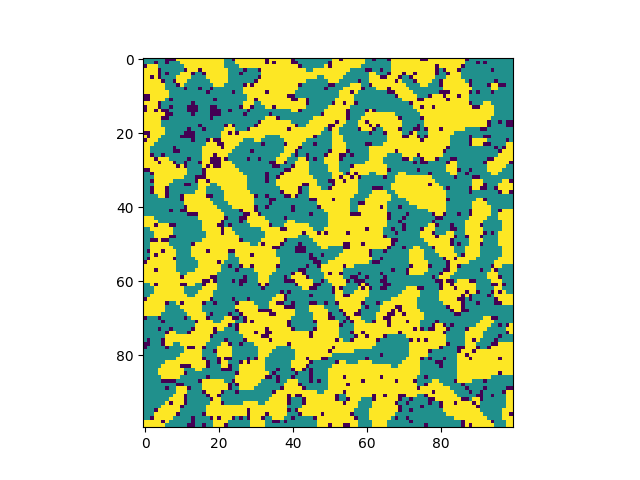

In [55]:

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()


fig.canvas.draw()

for i in range(len(placements)):
    ax.clear()
    ax.imshow(placements[i])
    fig.canvas.draw()